In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_california_housing


In [5]:
housing = fetch_california_housing()

In [6]:
type(housing)

sklearn.utils.Bunch

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
data = pd.DataFrame(data = housing.data, columns = housing.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
print(housing.target)
print(housing.target_names)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
['MedHouseVal']


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data
y =housing.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor(n_estimators=10, random_state=0)

In [14]:
rm.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
predictions = rm.predict(X_test)

C:\Users\sandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

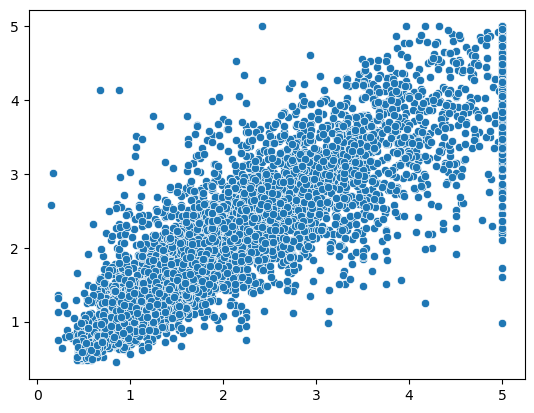

In [16]:
sns.scatterplot(y_test,predictions)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

0.3556925998238403
0.2865202799571556
0.7849902147947891


In [19]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scaled_data =scale.fit_transform(X_train)
X_test_scaled_data = scale.transform(X_test)

In [20]:
rm1 = RandomForestRegressor(n_estimators=10, random_state=0)
rm1.fit(X_train_scaled_data,y_train)
predictions2 = rm1.predict(X_test_scaled_data)

In [21]:
print(mean_absolute_error(y_test,predictions2))
print(mean_squared_error(y_test,predictions2))
print(r2_score(y_test,predictions2))

0.3574955820610687
0.29210783354274616
0.7807972177181421


In [23]:
tree_to_plot = rm1.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>